<a href="https://www.kaggle.com/code/phetchphrapinechai/hw2-regression?scriptVersionId=295859956" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear regression (predicting a continuous value):

*** Question:**
>     CalCOFI data: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bottle.csv
/kaggle/input/cast.csv


In [2]:
import pandas as pd

bottle = pd.read_csv("/kaggle/input/bottle.csv")
cast = pd.read_csv("/kaggle/input/cast.csv")

bottle.head(2)

/tmp/ipykernel_17/2456614947.py:3: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv("/kaggle/input/bottle.csv")
/tmp/ipykernel_17/2456614947.py:4: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast = pd.read_csv("/kaggle/input/cast.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [4]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
bottle_df = bottle[['T_degC','Depthm','STheta']]
# And called again
bottle_df.columns = ['Temperature', 'Dept','Potential_density']

In [5]:
bottle_df = bottle_df[:][:500]      # lets take limit for speed regression calculating
bottle_df.head()

,Temperature,Dept,Potential_density
0,10.50,0,25.649
1,10.46,8,25.656
2,10.46,10,25.654
3,10.45,19,25.643
4,10.45,20,25.643


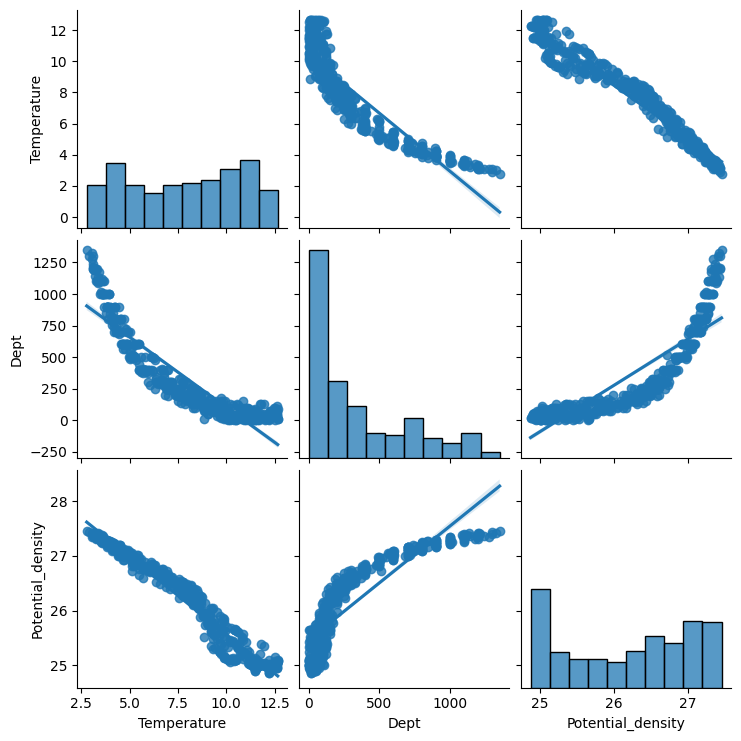

In [6]:
# See picture with scatter or plot method

# sns.lmplot(x="Salinity", y="Temperature", data=bottle_df, order=2, ci=None);
sns.pairplot(bottle_df, kind="reg")

In [7]:
# see how many null values we have

bottle_df.isnull().sum()

Temperature          1
Dept                 0
Potential_density    7
dtype: int64

In [8]:
# Drop NaN or missing input numbers

bottle_df.fillna(method='ffill', inplace=True)
bottle_df.isnull().sum()

/tmp/ipykernel_17/948037637.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bottle_df.fillna(method='ffill', inplace=True)


Temperature          0
Dept                 0
Potential_density    0
dtype: int64

In [9]:
# Features chose

X1 = np.array(bottle_df['Dept']).reshape(-1, 1)
X2 = np.array(bottle_df['Potential_density']).reshape(-1, 1)
y = np.array(bottle_df['Temperature']).reshape(-1, 1)

In [10]:
# Split data as %20 is test and %80 is train set
X1 = X1.reshape(-1, 1)
X2 = X2.reshape(-1, 1)

X = np.hstack((X1, X2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X2_train = X_train[:, 1].reshape(-1, 1)
X2_test  = X_test[:, 1].reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

# 1.Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X2_train, y_train)

LinearRegression()

In [12]:
y_pred = lin_df.predict(X2_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X2_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 94.8%


In [13]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.948


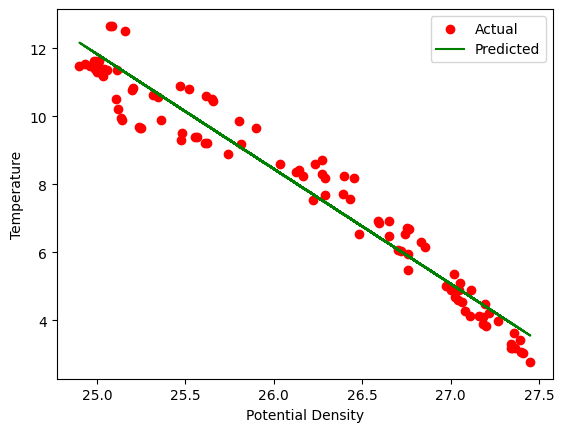

In [14]:
plt.scatter(X2_test, y_test, color='r', label='Actual')
plt.plot(X2_test, y_pred, color='g', label='Predicted')

plt.xlabel('Potential Density')
plt.ylabel('Temperature')

plt.legend()
plt.show()

# 2.Multiple Linear Regression

In [15]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([[-1.94794526e-03, -2.67213713e+00]])

In [16]:
y_pred = mlin_df.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, mlin_df.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)));      # this is test error score

RMSE Score for Test set: 0.5
R2 Score for Test set: 0.97


## 2.1.Multiple Linear Regression Model Tunning

In [17]:
# cross validation method is giving better and clear result

cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

np.float64(0.9571311815078547)

In [18]:
mlin_df.score(X_train, y_train)      # r2 value

0.9702479705475759

In [19]:
np.sqrt(-cross_val_score(mlin_df, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

np.float64(0.5045821564497508)

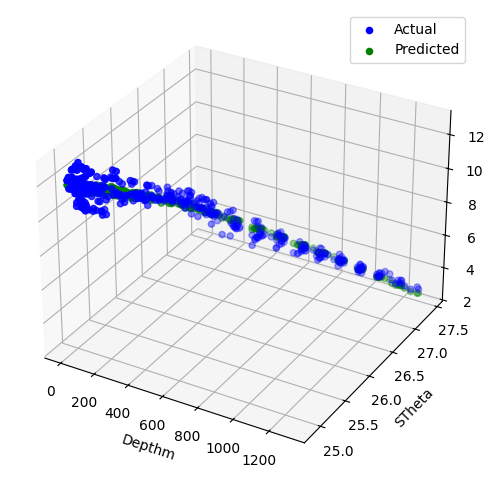

In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

lin_df = LinearRegression()
lin_df.fit(X_train, y_train)   # <-- Train ด้วย 2 ฟีเจอร์

y_pred_train = lin_df.predict(X_train)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:,0], X_train[:,1], y_train.ravel(), color='blue', label='Actual')
ax.scatter(X_train[:,0], X_train[:,1], y_pred_train.ravel(), color='green', label='Predicted')

ax.set_xlabel('Depthm')
ax.set_ylabel('STheta')
ax.set_zlabel('Salnty')
ax.legend()

plt.show()

* This was just for train set and you can also do for test set.

# 3.Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 3)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)


In [22]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.46
R2 Score for Test set: 0.97


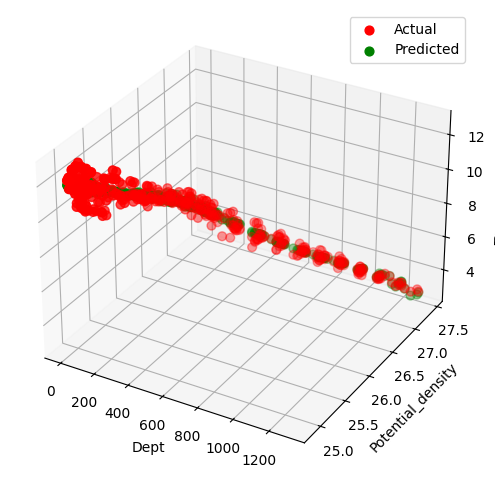

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train[:,0], X_train[:,1], y_train.ravel(),
    color='red', s=40, label='Actual'
)

ax.scatter(
    X_train[:,0], X_train[:,1],
    polynomial_predict.ravel(),
    color='green', s=40, label='Predicted'
)

ax.set_xlabel('Dept')
ax.set_ylabel('Potential_density')
ax.set_zlabel('Temperature')
ax.legend()
plt.show()
